In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

with open("E:\ML\Text_for_model.txt",'r',encoding="utf-8") as myfile:
    mytext=myfile.read()

In [2]:
mytext


'Kolkata, formerly known as Calcutta, is the capital city of the Indian state of West Bengal. It is a vibrant metropolis with a rich cultural and historical heritage. Here are some key aspects of Kolkata:\n\n1. **Cultural Hub:**\n   - Kolkata is often considered the cultural capital of India, with a rich heritage in literature, arts, music, and theater. The city has produced numerous Nobel laureates, poets, writers, and filmmakers.\n   - The annual Kolkata International Film Festival and Kolkata Literary Meet are significant cultural events that attract artists and intellectuals from around the world.\n\n2. **Historical Landmarks:**\n   - **Victoria Memorial:** A symbol of Kolkata, this majestic marble building was built in memory of Queen Victoria. It now serves as a museum showcasing the city\'s history and art.\n   - **Howrah Bridge:** An iconic cantilever bridge over the Hooghly River, Howrah Bridge is one of the busiest and most recognized landmarks in Kolkata.\n   - **Indian Muse

In [3]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1

In [4]:
mytokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'is': 4,
 'a': 5,
 'in': 6,
 'to': 7,
 'for': 8,
 'its': 9,
 'temple': 10,
 'as': 11,
 'are': 12,
 'it': 13,
 'cultural': 14,
 'with': 15,
 'known': 16,
 'india': 17,
 'mahal': 18,
 'one': 19,
 'fort': 20,
 'heritage': 21,
 'from': 22,
 'on': 23,
 'world': 24,
 'city': 25,
 'was': 26,
 'architecture': 27,
 'caves': 28,
 'by': 29,
 'architectural': 30,
 'that': 31,
 'most': 32,
 'some': 33,
 'site': 34,
 'also': 35,
 'delhi': 36,
 'beach': 37,
 'kolkata': 38,
 'historical': 39,
 'has': 40,
 'located': 41,
 'red': 42,
 'tea': 43,
 'this': 44,
 'often': 45,
 'significant': 46,
 '2': 47,
 'famous': 48,
 'significance': 49,
 'main': 50,
 'unesco': 51,
 'popular': 52,
 'taj': 53,
 'darjeeling': 54,
 'vibrant': 55,
 'rich': 56,
 '1': 57,
 'river': 58,
 'which': 59,
 'various': 60,
 'structure': 61,
 'jagannath': 62,
 'an': 63,
 'religious': 64,
 'street': 65,
 'their': 66,
 'destination': 67,
 'mughal': 68,
 'sun': 69,
 'indian': 70,
 'here': 71,
 'key': 72,
 

In [5]:
my_input_sequences = []

for line in mytext.split('\n'):
    #print(line)
    token_list = mytokenizer.texts_to_sequences([line])[0] 
    #print(token_list)
    for i in range(1, len(token_list)): 
        my_n_gram_sequence = token_list[:i+1] 
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
#print(input_sequences)

[38, 339]
[38, 339, 16]
[38, 339, 16, 11]
[38, 339, 16, 11, 340]
[38, 339, 16, 11, 340, 4]
[38, 339, 16, 11, 340, 4, 1]
[38, 339, 16, 11, 340, 4, 1, 83]
[38, 339, 16, 11, 340, 4, 1, 83, 25]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13, 4]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13, 4, 5]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13, 4, 5, 55]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13, 4, 5, 55, 225]
[38, 339, 16, 11, 340, 4, 1, 83, 25, 3, 1, 70, 84, 3, 341, 342, 13, 4, 5, 55, 

In [6]:
max_sequence_len = max([len(x) for x in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))


In [7]:
input_sequences


array([[   0,    0,    0, ...,    0,   38,  339],
       [   0,    0,    0, ...,   38,  339,   16],
       [   0,    0,    0, ...,  339,   16,   11],
       ...,
       [   0,    0,    0, ...,    5, 1213,  336],
       [   0,    0,    0, ..., 1213,  336,    7],
       [   0,    0,    0, ...,  336,    7,  123]])

In [8]:
x = input_sequences[:,:-1]
y = input_sequences[:,-1]


In [9]:
x

array([[   0,    0,    0, ...,    0,    0,   38],
       [   0,    0,    0, ...,    0,   38,  339],
       [   0,    0,    0, ...,   38,  339,   16],
       ...,
       [   0,    0,    0, ...,  127,    5, 1213],
       [   0,    0,    0, ...,    5, 1213,  336],
       [   0,    0,    0, ..., 1213,  336,    7]])

In [10]:
y

array([339,  16,  11, ..., 336,   7, 123])

In [11]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [12]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 88, 100)           121400    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1214)              183314    
                                                                 
Total params: 455314 (1.74 MB)
Trainable params: 455314 (1.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x,y, epochs=200, verbose=1)


Epoch 1/200


135/135 [==============================] - 12s 69ms/step - loss: 6.3126 - accuracy: 0.0797
Epoch 2/200
135/135 [==============================] - 9s 67ms/step - loss: 5.8329 - accuracy: 0.0862
Epoch 3/200
135/135 [==============================] - 8s 60ms/step - loss: 5.6466 - accuracy: 0.1084
Epoch 4/200
135/135 [==============================] - 8s 60ms/step - loss: 5.4002 - accuracy: 0.1356
Epoch 5/200
135/135 [==============================] - 8s 58ms/step - loss: 5.1043 - accuracy: 0.1662
Epoch 6/200
135/135 [==============================] - 8s 59ms/step - loss: 4.8198 - accuracy: 0.1962
Epoch 7/200
135/135 [==============================] - 8s 58ms/step - loss: 4.5616 - accuracy: 0.2186
Epoch 8/200
135/135 [==============================] - 8s 58ms/step - loss: 4.3033 - accuracy: 0.2496
Epoch 9/200
135/135 [==============================] - 8s 59ms/step - loss: 4.0662 - accuracy: 0.2699
Epoch 10/200
135/135 [==============================] - 8s 59ms/step - loss: 3

135/135 [==============================] - 8s 61ms/step - loss: 0.1017 - accuracy: 0.9676
Epoch 74/200
135/135 [==============================] - 8s 61ms/step - loss: 0.0991 - accuracy: 0.9699
Epoch 75/200
135/135 [==============================] - 8s 61ms/step - loss: 0.0990 - accuracy: 0.9690
Epoch 76/200
135/135 [==============================] - 8s 61ms/step - loss: 0.1001 - accuracy: 0.9695
Epoch 77/200
135/135 [==============================] - 8s 62ms/step - loss: 0.0956 - accuracy: 0.9690
Epoch 78/200
135/135 [==============================] - 8s 61ms/step - loss: 0.0927 - accuracy: 0.9713
Epoch 79/200
135/135 [==============================] - 8s 63ms/step - loss: 0.0904 - accuracy: 0.9706
Epoch 80/200
135/135 [==============================] - 8s 61ms/step - loss: 0.0899 - accuracy: 0.9704
Epoch 81/200
135/135 [==============================] - 8s 61ms/step - loss: 0.0877 - accuracy: 0.9692
Epoch 82/200
135/135 [==============================] - 8s 60ms/step - loss: 0.0866 - 

135/135 [==============================] - 8s 59ms/step - loss: 0.1285 - accuracy: 0.9569
Epoch 153/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0985 - accuracy: 0.9648
Epoch 154/200
135/135 [==============================] - 8s 60ms/step - loss: 0.0722 - accuracy: 0.9713
Epoch 155/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0684 - accuracy: 0.9702
Epoch 156/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0673 - accuracy: 0.9723
Epoch 157/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0669 - accuracy: 0.9718
Epoch 158/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0669 - accuracy: 0.9720
Epoch 159/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0669 - accuracy: 0.9718
Epoch 160/200
135/135 [==============================] - 8s 59ms/step - loss: 0.0668 - accuracy: 0.9720
Epoch 161/200
135/135 [==============================] - 8s 60ms/step - loss: 

In [19]:
input_text = input("Enter your word: ")
predict_next_words= int(input("Enter the no. of prediction: "))
for _ in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') 
    predicted = np.argmax(model.predict(token_list), axis=-1)
    #predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word =""

    for word, index in mytokenizer.word_index.items(): 
        if index == predicted:
            output_word = word
            break

    input_text += " " + output_word
print("The prediction is:",input_text)

Enter your word: kolkata
Enter the no. of prediction: 5
[38]
1/1 [==============================] - 0s 25ms/step
[38, 4]
1/1 [==============================] - 0s 23ms/step
[38, 4, 16]
1/1 [==============================] - 0s 31ms/step
[38, 4, 16, 8]
1/1 [==============================] - 0s 34ms/step
[38, 4, 16, 8, 9]
1/1 [==============================] - 0s 27ms/step
The prediction is: kolkata is known for its ancient


In [16]:
history.history.keys()


dict_keys(['loss', 'accuracy'])

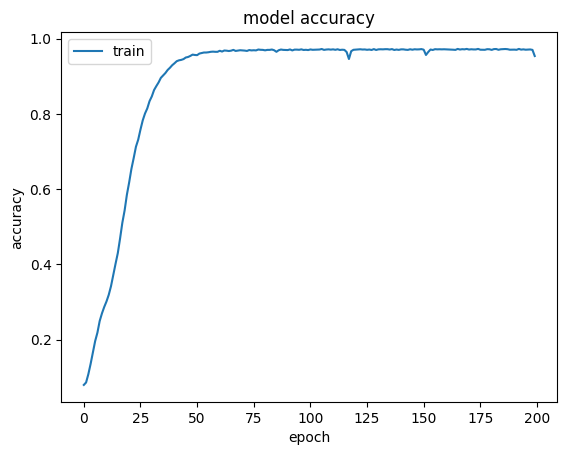

In [17]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

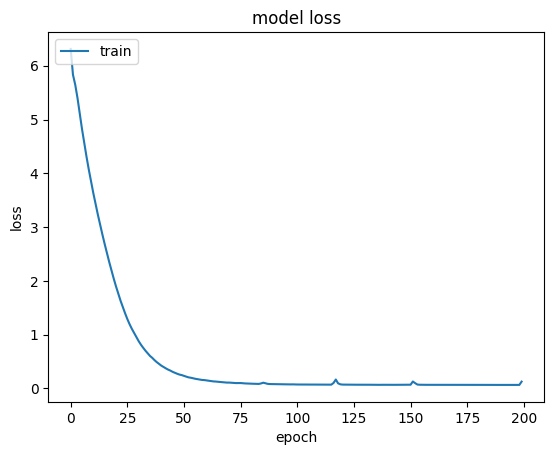

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()